In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
def draw_kelvin_angle(ax, x, x0=[0], color='cyan', alpha=0.3):
    slope = np.sqrt(1./8.)
    y = slope * x
    a = alpha
    for xz in x0:
        ax.fill_between(x+xz, y1=y, y2=-y, color=color, alpha=a)
        a += 0.1

def draw_inner_angle(ax, x, T, x0=[0], color='purple', alpha=0.3):
    slope = np.sqrt(T - 1.) / (2. * T - 1.)
    y = slope * x
    a = alpha
    for xz in x0:
        ax.fill_between(x+xz, y1=y, y2=-y, color=color, alpha=a)
        a += 0.1

def draw_parametric_wake(ax, nmax, k, x0=[0], color1='orange', color2='red', phase=0.25):
    k32 = np.power(k, 1.5)
    xtterm = (2*k - 1) / k32
    ytterm = np.sqrt(k - 1) / k32
    inner = k < 1.5
    for n in range(1, nmax+1):
        xt = -np.pi * (2 * n + 1 + phase) * xtterm
        yt = -np.pi * (2 * n + 1 + phase) * ytterm
        for xz in x0:
            ax.plot(xt[inner]+xz, yt[inner], color=color1)
            ax.plot(xt[inner]+xz, -yt[inner], color=color1)
            ax.plot(xt[~inner]+xz, yt[~inner], color=color2)
            ax.plot(xt[~inner]+xz, -yt[~inner], color=color2)

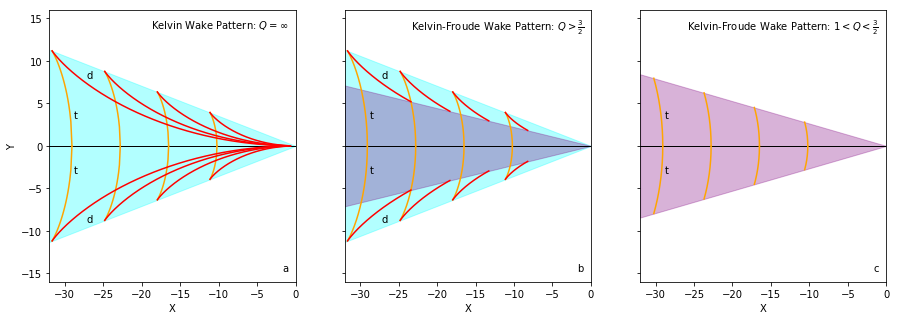

In [3]:
Qs = [1000, 5, 1.1]
tmax = [100000, 10000, 1000]
labels = [r'Kelvin Wake Pattern: $Q = \infty$', 
          r'Kelvin-Froude Wake Pattern: $Q > \frac{3}{2}$', 
          r'Kelvin-Froude Wake Pattern: $1 < Q < \frac{3}{2}$']
nqs = len(Qs)
fig = plt.figure(figsize=(15, 5))

xlim = np.array([-32, 0])
ylim = np.array([-16, 16])

label = 'a'

for i in range(nqs):
    ax = fig.add_subplot(1, nqs, i+1)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.text(0.97, 0.97, labels[i], 
                    transform=ax.transAxes,
                    horizontalalignment='right',
                    verticalalignment='top')
    ax.text(0.97, 0.03, label, 
            transform=ax.transAxes,
            horizontalalignment='right',
            verticalalignment='bottom')
    label = chr(ord(label) + 1)
    if i == 0:
        ax.set_ylabel('Y')
    else:
        ax.tick_params(axis='y', which='both', labelleft=False)
    #ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.set_xlabel('X')
    ax.axhline(color='black', linewidth=1)
    k = np.linspace(1, Qs[i], tmax[i])
    if Qs[i] > 1.5:
        draw_kelvin_angle(ax, xlim)
        ax.text(0.15, 0.22, 'd',
                transform=ax.transAxes)
        ax.text(0.15, 0.75, 'd',
                transform=ax.transAxes)
    if Qs[i] < 100:
        draw_inner_angle(ax, xlim, Qs[i])
    draw_parametric_wake(ax, 4, k)
    ax.text(0.1, 0.4, 't',
            transform=ax.transAxes)
    ax.text(0.1, 0.6, 't',
            transform=ax.transAxes)
    
plt.show()

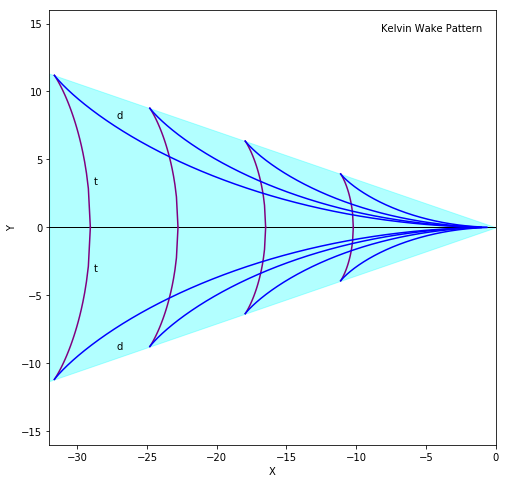

In [26]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

xlim = np.array([-32, 0])
ylim = np.array([-16, 16])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.axhline(color='black', linewidth=1)

ax.text(0.97, 0.97, 'Kelvin Wake Pattern', 
        transform=ax.transAxes,
        horizontalalignment='right',
        verticalalignment='top')

Q = 1000
tmax = Q * 100
k = np.linspace(1, Q, tmax)

draw_kelvin_angle(ax, xlim)
ax.text(0.15, 0.22, 'd',
        transform=ax.transAxes)
ax.text(0.15, 0.75, 'd',
        transform=ax.transAxes)
draw_parametric_wake(ax, 4, k)
ax.text(0.1, 0.4, 't',
        transform=ax.transAxes)
ax.text(0.1, 0.6, 't',
        transform=ax.transAxes)

plt.show()


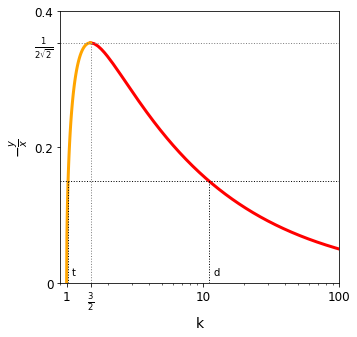

In [88]:
fig = plt.figure(figsize=(5, 5))
ax = fig.gca()

xlim = [0.9, 100]
ylim = [0, 0.4]
xrng = xlim[1] - xlim[0]
yrng = ylim[1] - ylim[0]

xpk = 1.5
ypk = 1 / (2 * np.sqrt(2))

yh = 0.15
yh2 = yh * yh
xh1 = (1 + 4 * yh2 - np.sqrt(1 - 8 * yh2)) / (8 * yh2)
xh2 = (1 + 4 * yh2 + np.sqrt(1 - 8 * yh2)) / (8 * yh2)

lwmain = 3
lwdot = 1

#x = np.linspace(1, xlim[1], 1000)
#ax.plot(x, np.sqrt(x - 1) / (2 * x - 1), color='red', linewidth=lwmain)
xg = np.linspace(1.5, xlim[1], 1000)
xl = np.linspace(1.0, 1.5, 100)
ax.semilogx(xg, np.sqrt(xg-1) / (2 * xg - 1), color='red', linewidth=lwmain)
ax.semilogx(xl, np.sqrt(xl-1) / (2 * xl - 1), color='orange', linewidth=lwmain)

#Lines touching the peak
ax.axhline(y=ypk, color='gray', linestyle=':', linewidth=lwdot)#, xmax=(xpk - xlim[0]) / xrng)
ax.axvline(x=xpk, color='gray', linestyle=':', linewidth=lwdot, ymax=(ypk - ylim[0]) / yrng)

#Intersection at two points
ax.axhline(y=yh, color='black', linestyle=':', linewidth=lwdot)#, xmax=(xh2 - xlim[0]) / xrng)
ax.axvline(x=xh1, color='black', linestyle=':', linewidth=lwdot, ymax=(yh - ylim[0]) / yrng)
ax.axvline(x=xh2, color='black', linestyle=':', linewidth=lwdot, ymax=(yh - ylim[0]) / yrng)

#Set ticks
plt.xticks([1., xpk, 10., xlim[1]], 
           [1, r'$\frac{3}{2}$', 10, xlim[1]],
           fontsize=12)
plt.yticks([ylim[0], ypk, ylim[0] + yrng / 2, ylim[1]], 
           [ylim[0], r'$\frac{1}{2\sqrt{2}}$', ylim[0] + yrng / 2, ylim[1]],
           fontsize=12)

#Add transverse/diverging labels
#ax.text((xh1 - xlim[0]) / xrng + 0.02, 0.03, 't', 
#        transform=ax.transAxes)
#ax.text((xh2 - xlim[0]) / xrng + 0.02, 0.03, 'd',
#        transform=ax.transAxes)
ax.text(0.04, 0.03, 't', transform=ax.transAxes)
ax.text(0.55, 0.03, 'd', transform=ax.transAxes)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('k', fontsize=14)
ax.set_ylabel(r'$-\frac{y}{x}$', fontsize=14)
plt.show()

/home/jcolen/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


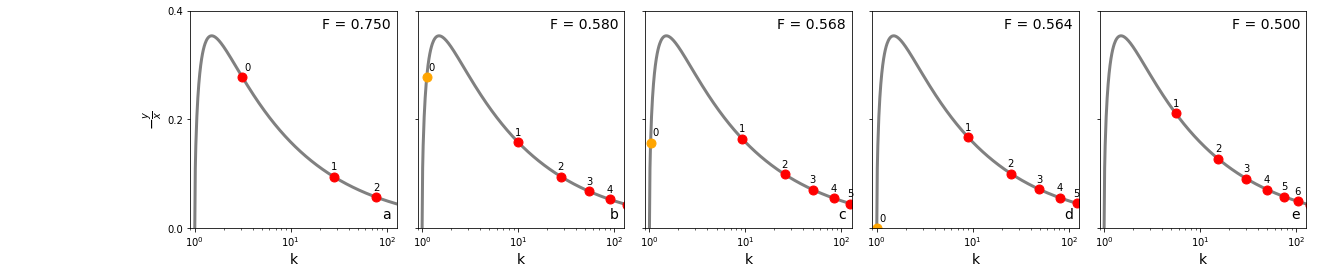

In [5]:
def fkn(k):
    return np.sqrt(k-1)/(2*k-1)

def kno(n, F):
    return np.power(np.pi * (2 * n + 1) * F * F, 2)

def kne(n, F):
    return np.power(np.pi * (2 * n) * F * F, 2)


xlim = [0.9, 128]
ylim = [0, 0.4]

lwmain = 3
msize = 9

k = np.linspace(1, xlim[1], 10000)
n = np.arange(0, 10)
Fs = [0.750, 0.580, 0.568, 0.564, 0.500]

fig, axes = plt.subplots(nrows=1, ncols=len(Fs), sharey=True, figsize=(20, 4))
label='a'
for i, F in enumerate(Fs):
    ax = axes[i]
    
    ks = kno(n, F)
    
    ax.semilogx(k, fkn(k), color='gray', linewidth=lwmain)
    ax.semilogx(ks[ks < 1.5], fkn(ks[ks < 1.5]), color='orange', linestyle='', marker='o', markersize=msize)
    ax.semilogx(ks[ks >= 1.5], fkn(ks[ks >= 1.5]), color='red', linestyle='', marker='o', markersize=msize)

    for j, nv in enumerate(n):
        xoff, yoff = 0, 5
        if nv == 0:
            xoff = 5
        ax.annotate(
            nv, xy=(ks[j], fkn(ks[j])), xytext=(xoff, yoff),
            textcoords='offset points', ha='center', va='bottom')    
    
    if i==3:
        ax.semilogx(1, 0, color='orange', marker='o', markersize=msize)
        ax.annotate(
            '0', xy=(1, 0), xytext=(3, 5),
            textcoords='offset points', ha='left', va='bottom') 
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel('k', fontsize=14)
    if i == 0:
        ax.set_ylabel(r'$-\frac{y}{x}$', fontsize=14)
        ax.set_yticks([0.0, 0.2, 0.4])
        ax.set_yticklabels([0.0, 0.2, 0.4])
        
    ax.text(0.97, 0.97, r'F = %.3f' % F, transform=ax.transAxes, 
            horizontalalignment='right', 
            verticalalignment='top',
            fontsize=14)
    ax.text(0.97, 0.03, label, transform=ax.transAxes,
            horizontalalignment='right',
            verticalalignment='bottom',
            fontsize=14)
    label = chr(ord(label) + 1)

    fig.subplots_adjust(wspace=0.1)

plt.show()

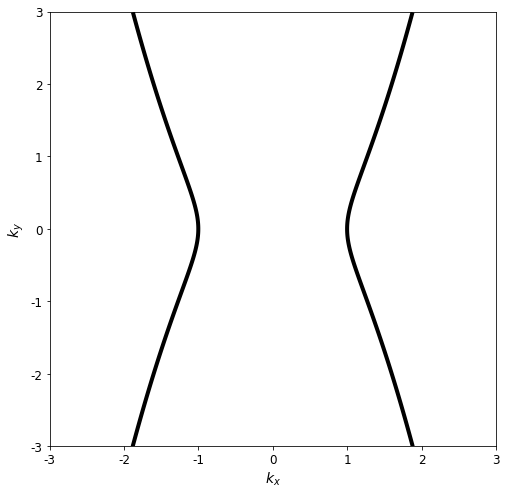

In [4]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

xlim = [-3.0, 3.0]
ylim = [-3.0, 3.0]
delta = 0.01
x = np.arange(xlim[0], xlim[1], delta)
y = np.arange(ylim[0], ylim[1], delta)
X, Y = np.meshgrid(x, y)

kx2 = np.power(X, 2)
k = np.sqrt(np.power(X, 2) + np.power(Y, 2))

kmaxs = [2.0, 1.25, 0.75]
colors = ['blue', 'purple', 'brown']
'''
for kmax, color in zip(kmaxs, colors):
    xc = kmax / xlim[1] / 2.
    yc = kmax / ylim[1] / 2.
    ax.axhline(y=kmax,  xmin=0.5-xc, xmax=0.5+xc, color=color)
    ax.axhline(y=-kmax, xmin=0.5-xc, xmax=0.5+xc, color=color)
    ax.axvline(x=kmax,  ymin=0.5-yc, ymax=0.5+yc, color=color)
    ax.axvline(x=-kmax, ymin=0.5-yc, ymax=0.5+yc, color=color)
'''
ax.contour(X, Y, kx2 - k, levels=[0], colors='black', linewidths=[4])

plt.xticks([-3, -2, -1, 0, 1, 2, 3], [-3, -2, -1, 0, 1, 2, 3], fontsize=12)
plt.yticks([-3, -2, -1, 0, 1, 2, 3], [-3, -2, -1, 0, 1, 2, 3], fontsize=12)

ax.set_xlabel(r'$k_x$', fontsize=14)
ax.set_ylabel(r'$k_y$', fontsize=14)

plt.show()